# Исследование работы магазина "Стримчик" по продажам компьютерных игр #

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Для комплексного исследования нам необходимо будет пройти следующие этапы:**

1. Обзор данных и получение общей информации о них

2. Предобработка данных (переименование столбцов, работа с пропусками, изучение типов данных, поиск и замена дубликатов)

3. Добавление дополнительных столбцов для анализа данных, расчет необходимых показателей

4. Исследовательский анализ данных

5. Выводы по итогам проекта

**Целью исследования являются следующие направления:**

* Оценить качество данных и проверить их полноту

* Добавить необходимые расчеты / столбцы / показатели

* Провести исследовательский анализ данных по каждому показателю

* Проанализировать потенциально прибыльные платформы

* Определить актуальный период для построения прогноза на будующий год

* Составить портрет пользователя по каждому из регионов, оценить структуру продаж в зависимости от регионам по платформам и жанрам

* Выявить влияние рейтинга ESRB на объем продаж

## Откройте файл с данными и изучите общую информацию.

In [ ]:
# импорт библиотек pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
# чтение и загрузка файла
game = pd.read_csv('/datasets/games.csv')
display(game.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание данных

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


### Изучение общей информации о данных

In [ ]:
# выведем общую информацию о данных

game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
game.shape

(16715, 11)

Датасет содержит всего 11 столбцов и 16 715 строк, при этом уже очевидно, что в 6 столбцах данные частично отсутствуют.

### Гистограмма по столбцам таблицы

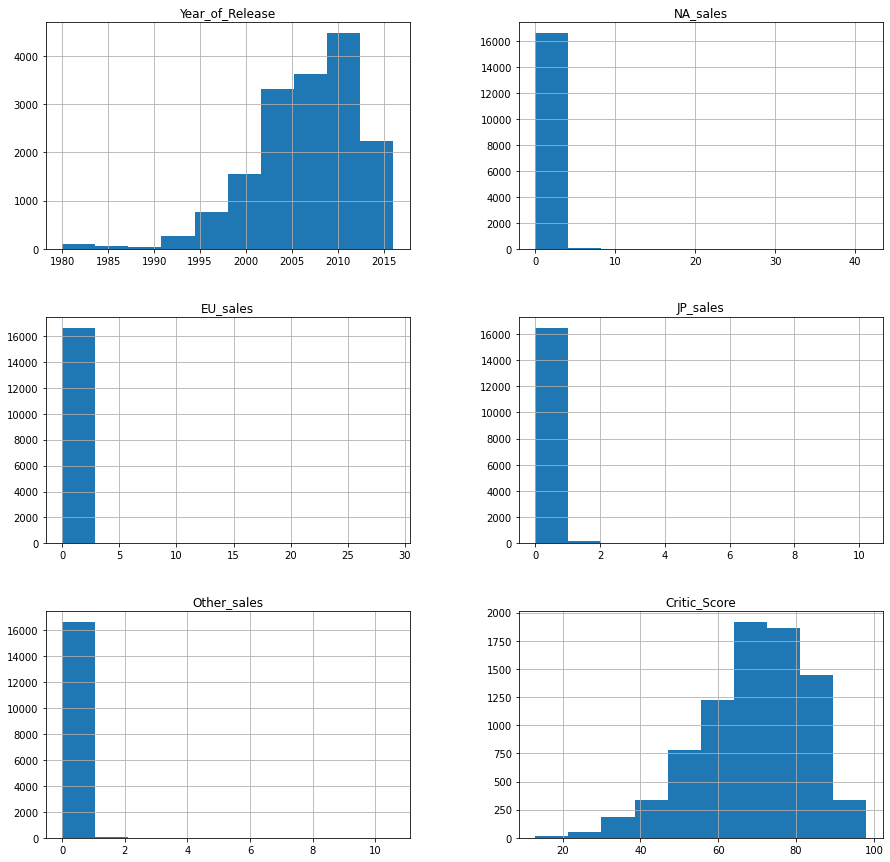

In [ ]:
game.hist(figsize=(15, 15));

По гистограммам видно, что данные неоднородные и требуют детального изучения.

## Предобработка данных

### Приведение столбцов к нижнему регистру

In [ ]:
# приведем столбцы к нижнему регистру
game.columns = game.columns.str.lower()
display(game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками

In [ ]:
# выведение количество пропущенных значений для каждого столбца
game.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как ранее отмечалось, в 6 столбцах частично отсутствуют значения. Заполним пропуски там, где это возможно (начнем с минимальных значений по возрастанию).

Причины, по которым данные отсутсвовали и как заполнять пропуски:

name - пропущено 2 значения, видимо, по ошибке (совместно и со столбцом genre). Заполним пропуски пустой строкой

genre - Заполним пропуски пустой строкой, аналогично столбцу name

year_of_release - пропущено 269 значений, возможно год выпука не известен и чтобы в дальнейшем корректно анализирость и преобразовать тип данных удалим эти пропуски (1.6% от общего датасета, несущественно)

user_score, rating, critic_score - пропуски по этим столбцам практически схожи по количеству: ~ 6700 (user_score, rating) и
~ 8500 (critic_score). Если посмотреть на годы выпуска игр по этим строкам,то можно предположить, что в те годы (198--/20--) по таким играм оценки не проставлялись, либо не проходили экспертную оценку. Оставляем пропуски, как есть.

In [ ]:
# посмотрим строки отстуствующих данных по столбцу name
display(game[game['name'].isna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
game['name'] = game['name'].fillna('')
game['genre'] = game['genre'].fillna('')

In [ ]:
# посмотрим строки отстуствующих данных по столбцу year_of_release
display(game[game['year_of_release'].isna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [ ]:
game = game.dropna(subset=['year_of_release'])
game['year_of_release'].isna().sum()

0

In [ ]:
# посмотрим строки отстуствующих данных по столбцу user_score
display(game[game['user_score'].isna()].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [ ]:
# посмотрим строки отстуствующих данных по столбцу rating
display(game[game['rating'].isna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [ ]:
# посмотрим строки отстуствующих данных по столбцу critic_score
display(game[game['critic_score'].isna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


### Изучение типов данных

На предыдущем шаге, где смотрели инфо по таблице, было обнаружено,что типы данных не соответствуют их смыслу.

Поэтому необходимо заменить их для корректного исследования в дальнейшем.

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
# замена по столбцу `year`
#game['year_of_release'] = pd.to_datetime(game['year_of_release'],format = '%Y')
game['year_of_release'] = game['year_of_release'].astype('int64')
# посмотрим какие значения по этому показателю есть
game['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [ ]:
# посмотрим какие значения по этому показателю есть
game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
# необходимо заменить значение "tbd" на NaN
game['user_score'] = game['user_score'].replace('tbd', 'Nan')

In [ ]:
# заменим тип данных в столбце `user_score` с object на float
game['user_score'] = game['user_score'].astype(float)

In [ ]:
# посмотрим какие значения по этому показателю есть
game['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По этому столбцу тип данных определен корректно.

In [ ]:
# посмотрим пропуски в столбце 'rating':
rating_na = game[game['rating'].isna()]
#display(rating_na.head())

# выведем количество пропущенных значений по наименованию игры
display(rating_na['name'].value_counts())
# выведем количество пропущенных значений по платформе
display(rating_na['platform'].value_counts())

The Amazing Spider-Man 2 (2014)                     7
FIFA 12                                             7
Sonic & All-Stars Racing Transformed                6
Disney Infinity 2.0: Marvel Super Heroes            6
Cars 2                                              6
                                                   ..
Mary-Kate and Ashley: Crush Course                  1
Little Battlers eXperience: Wars                    1
Kirby 64: The Crystal Shards                        1
The Fairly OddParents: Breakin' Da Rules            1
Jewel Quest Mysteries: Curse of the Emerald Tear    1
Name: name, Length: 5777, dtype: int64

PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

In [ ]:
# заполним пропуски в столбце "rating" аббревиатурой "undefined"
game['rating'] = game['rating'].fillna('UNDEF')
display(game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNDEF
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNDEF


In [ ]:
# посмотрим какие значения по этому показателю есть
game['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
# в данном случае лучше заменить тип данных с float на int
game['critic_score'] = game['critic_score'].fillna(0)
game['critic_score'] = game['critic_score'].astype('int64')
# пришлось в этом столбце заменить значения Nan на 0, чтобы корректно преобразовать тип данных.

In [ ]:
# проверим еще раз , что тип данных отражен верно
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Расчет суммарных продаж во всех регионах

In [ ]:
# рассчитаем продажи и добавим новый столбец
game ['sales_all_region']=game[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all_region
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,UNDEF,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,UNDEF,31.38


### Поиск дубликатов

In [ ]:
game.duplicated().sum()
# явные дубликаты отсутствуют

0

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
# посчитаем количество выпущенных игр
game_count = pd.pivot_table(game, index = 'year_of_release', values = 'name', aggfunc = 'count')
game_count.columns = ['count']
display(game_count)

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


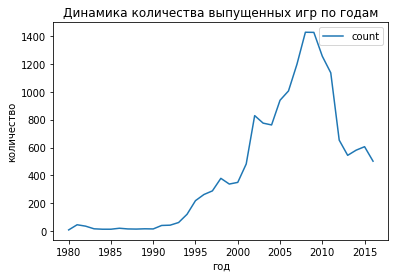

In [ ]:
# отразим графически полученные данные
game_count.plot()
plt.title('Динамика количества выпущенных игр по годам')
plt.xlabel('год')
plt.ylabel('количество')
plt.show()

In [ ]:
# посчитаем объем продаж (млн. проданных копий)
game_sales = pd.pivot_table(game, index = 'year_of_release', values = 'sales_all_region', aggfunc = 'sum')
game_sales.columns = ['sum']
display(game_sales)

,sum
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


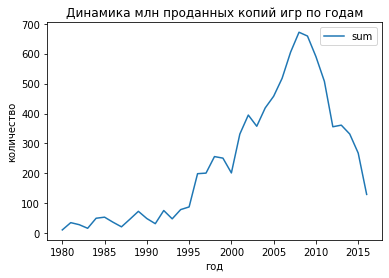

In [ ]:
# отразим графически полученные данные
game_sales.plot()
plt.title('Динамика млн проданных копий игр по годам')
plt.xlabel('год')
plt.ylabel('количество')
plt.show()

**Вывод**: оба графика вцелом повторяют динамику и динамика млн проданных копий игр по годам более подробна.

Отвечая на вопрос: Важны ли данные за все периоды? Если нам необходимо посмотреть общий тренд игровой индустрии, то данные за периоды важны, а именно достаточно брать промежутки по 5 лет.

Судя по графику, видно что индустрия развивалась в период с 1980 по 1995 годы (данные не слишком волатильны). Далее с развитием технологий и появлением персональных компьютеров с 1995 по 2000 год наблюдаем достаточную активность в росте продаж / выпуска игр. Активный рост наблюдается вплоть до 2008 года (к этому времени появилось много бесплатных игр, а также рост обусловлен ростом молодых пользователей (рождаемость в эти годы (с 1995) была достаточно высокой), чей возраст как раз к этому времени и приходился на школьников и студентов).

С 2009 года наблюдается активный спад в этом направлении. Обратившись к внешним источникам поиска информации были обозначены следующие причины спада: 1) влияние мирового кризиса на игровую индустрию (удорожание ресурсов, ограниченность поставок "железа", недостаток квалифицированного персонала), 2) укрупнение бизнеса (поглощение крупными геймдевами более мелких студий по созданию игр) и как следствие прекращение финансирования мелких проектов - увольнение сотрудников, 3) влияние государства в части ограничений такого рода контента и цензуры.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
# построим сводную таблицу по платформам игр
game_platform = pd.pivot_table(game, index = 'platform', values = 'sales_all_region', aggfunc = 'sum')
game_platform = game_platform.sort_values('sales_all_region', ascending = False)
display(game_platform)

,sales_all_region
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из сводной таблицы можем выбрать ТОП-6 платформ по объему продаж млн копий до 700 млн. Далее уже слишком большая дельта между платформами (начиная с 7й снижение в 2 раза).

In [ ]:
display(game_platform.head(6))

,sales_all_region
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Далее посмотрим динамику по годам.

In [ ]:
# создадим список из топовых платформ для удобства фильтрации
top_6_games = list(game_platform.index[:6])
top_6_games


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [ ]:
# выберем только эти платформы для построения графика

game_6 = game.query('platform == @top_6_games')
display(game_6.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all_region
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [ ]:
game_6_pivot = pd.pivot_table(game_6, index = 'year_of_release', columns = 'platform', values = 'sales_all_region', aggfunc = 'sum')
game_6_pivot

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


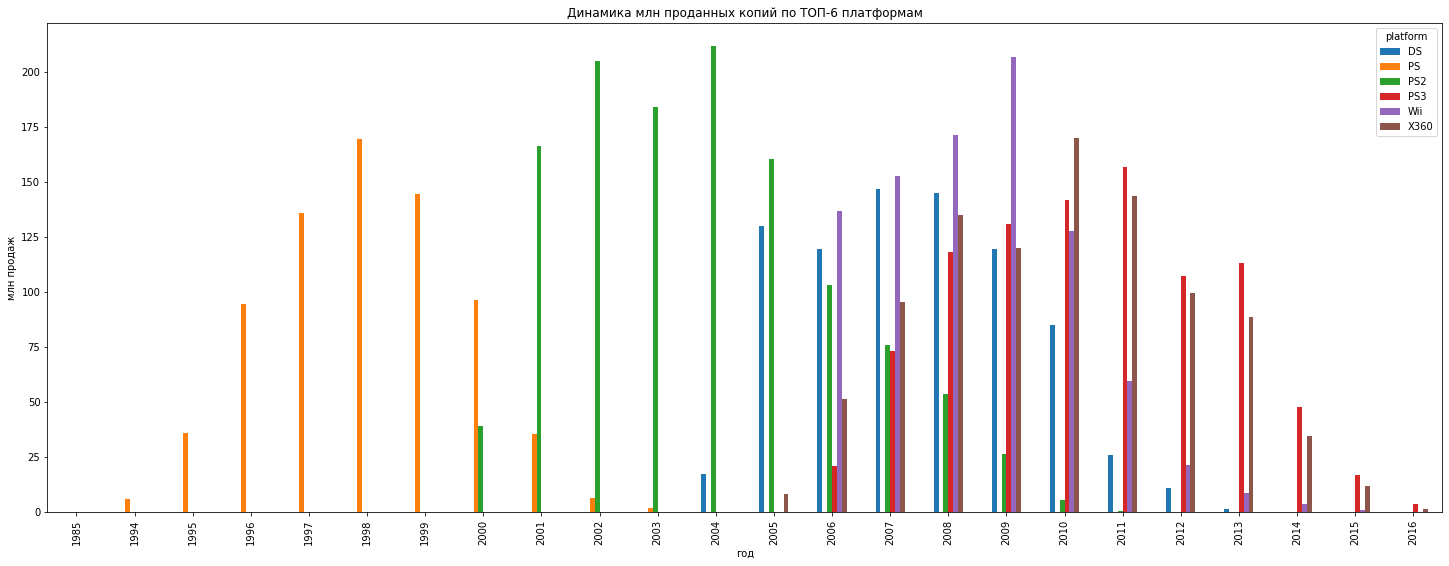

In [ ]:
# отразим графически полученные данные
game_6_pivot.plot(kind = 'bar', figsize=(25,9))
plt.title('Динамика млн проданных копий по ТОП-6 платформам')
plt.xlabel('год')
plt.ylabel('млн продаж')
plt.show()

**Вывод** Отобрали ТОП-6 платформ по объемам суммарных продаж млн копий. На графике видно с какой периодичностью появляются новые и исчезают старые платформы.

Например, PS существовала в период с 1994 по 2002 (8 лет), пока на смену не пришла PS2 в период с 2000 по 2006 (6 лет). Далее на смену ей пришла PS3 c 2006 по 2016 (10 лет). Платформа X360 просуществовала в период с 2005 по 2016 год, тоже 10 лет.

В итоге средний срок 8-10 лет для обновления платформы.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Чтобы ответить на этот вопрос, посмотрим на предыдущий график по платформам. На графике видна следующая динамика: когда запускается игровая платформа в среднем ей нужно 2-3 года на раскрутку, затем еще 2 года для достижения пиковых значений и потом продажи идут на спад с таким же темпом.

Поэтому чтобы спрогнозировать продажи на 2017 год, актуальный период для анализа и прогноза следует взять год выпуска платформ с 2012 года.

•	Не учитывайте в работе данные за предыдущие годы

In [ ]:
# сделаем необходимую выборку
game = game.query('year_of_release >= 2012')
display(game['year_of_release'].value_counts())

2012    653
2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: int64

In [ ]:
# посмотрим какая доля от датасета остается
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2886 non-null   object 
 1   platform          2886 non-null   object 
 2   year_of_release   2886 non-null   int64  
 3   genre             2886 non-null   object 
 4   na_sales          2886 non-null   float64
 5   eu_sales          2886 non-null   float64
 6   jp_sales          2886 non-null   float64
 7   other_sales       2886 non-null   float64
 8   critic_score      2886 non-null   int64  
 9   user_score        1531 non-null   float64
 10  rating            2886 non-null   object 
 11  sales_all_region  2886 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 293.1+ KB


**Остается для дальнейшей работы 2886 строк или 17%**

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
game.groupby('platform')["sales_all_region"].sum().sort_values(ascending = False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sales_all_region, dtype: float64

**Лидерами** по продажам являются: PS4, PS3, X360, 3DS, XOne

**Аутсайдеры:** PSV, Wii, DS, PSP

In [ ]:
platform_pivot = pd.pivot_table(game, index = 'year_of_release', columns = 'platform', values = 'sales_all_region', aggfunc = 'sum')

display(platform_pivot)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


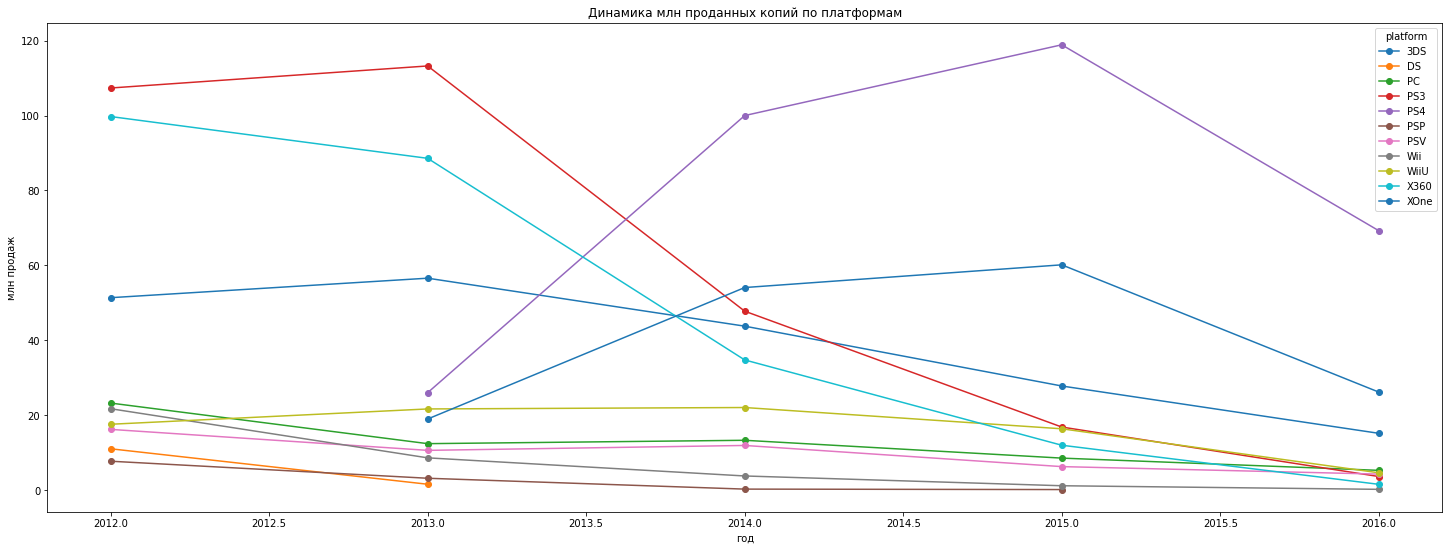

In [ ]:
# отразим графически полученные данные
platform_pivot.plot(figsize=(25,9), style='-o')
plt.title('Динамика млн проданных копий по платформам')
plt.xlabel('год')
plt.ylabel('млн продаж')
plt.show()

**Вывод** Продажи по всем платформам глобально падают в динамике по годам. Однако стоит отметить все же рост по двум платформам:

* PS4: 26 - 100 - 119 (запуск с 2013), данная платформа идет на смену предыдущей PS3, поэтому мы и наблюдаем рост в этом промеждутке лет.

* XOne: 19 - 54 - 60 (запуск с 2013), данная платформа идет на смену предыдущей Х360 , поэтому мы и наблюдаем рост в этом промеждутке лет.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

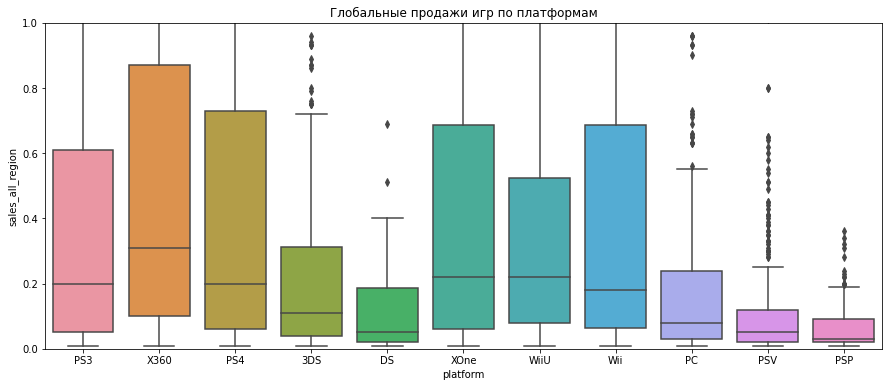

In [ ]:
# построили график "ящик с усами" по глобальным продажам
plt.figure(figsize=(15,6))
plt.ylim(0,1)

plt.title('Глобальные продажи игр по платформам')
sns.boxplot(x='platform', y = 'sales_all_region', data = game, dodge=False);



На графике видим, что игры отличаются между собой не только объемом продаж, но и медианное значение находится на разном уровне. Наибольшие медианы у платформы Х360. Минимальные значения продаж (и медиан) у платформ PSP PSV.

У всех платформ имеются выбросы (на графике они ограничены по оси У до значения = 1) - то есть были очень популярные игры и возможно в эти периоды их раздавали бесплатно для тестирования.

Как ранее выяснили, что самые продаваемые платформы - это PS3, PS4 и X360, XOne. На графике видим, что по ним имеются выбросы в значениях продаж - скорее всего были какие-то очень популярные игры.

In [ ]:
# посмотрим на общее распределение объемов продаж
display(game['sales_all_region'].describe())

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: sales_all_region, dtype: float64

In [ ]:
display(game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all_region
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,NaN,UNDEF,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,NaN,UNDEF,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [ ]:
display(game.tail(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all_region
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16684,7'scarlet,PSV,2016,Adventure,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.0,0.01,0.00,0.0,80,7.6,M,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.00,0.01,0.0,0,NaN,UNDEF,0.01


По представленным данным видим, что максимальный объем продаж составил 21 млн копий и был по игре Grand Theft Auto V на PS3 в 2013 году. Минимальные значения 0.01 млн по продажам приходится на ряд игр, выпущенных в 2014 и 2016 годах (см таблицу выше).

Среднее значение составляет 0.50 млн, а медиана равна 0.12 млн

**Далее выведем таблицу по каждой из представленных платформ**

In [ ]:
# выберем необходимые столбцы
game_platforms = game[['platform', 'sales_all_region']]
# посмотрим описание по каждой из платформ в одной таблице для удобства
game_platforms.groupby('platform').describe()

sales_all_region                                                  \
                    count      mean       std   min     25%   50%     75%   
platform                                                                    
3DS                 396.0  0.491439  1.387161  0.01  0.0400  0.11  0.3125   
DS                   31.0  0.404839  1.439245  0.01  0.0200  0.05  0.1850   
PC                  250.0  0.250600  0.494640  0.01  0.0300  0.08  0.2400   
PS3                 493.0  0.585781  1.462855  0.01  0.0500  0.20  0.6100   
PS4                 392.0  0.801378  1.609456  0.01  0.0600  0.20  0.7300   
PSP                 173.0  0.064682  0.071296  0.01  0.0200  0.03  0.0900   
PSV                 411.0  0.119659  0.203011  0.01  0.0200  0.05  0.1200   
Wii                  54.0  0.655000  1.165447  0.01  0.0625  0.18  0.6875   
WiiU                147.0  0.559116  1.058836  0.01  0.0800  0.22  0.5250   
X360                292.0  0.810068  1.712069  0.01  0.1000  0.31  0.8700   
XOne                247.0  0.645020  1.036139  0.01  0.0600  0.22  0.6850   

                 
            max  
platform         
3DS       14.60  
DS         8.06  
PC         5.14  
PS3       21.05  
PS4       14.63  
PSP        0.36  
PSV        1.96  
Wii        6.76  
WiiU       7.09  
X360      16.27  
XOne       7.39

**Вывод**

По графику "ящик с усами" мы можем выделить 4 группы платформ-конкурентов:

1) PS3 - X360 - PS4 - 3DS, отличники, они схожи по количеству продаж, их максимальный объем продаж находится в диапазоне от 14 до 21 млн., средний объем продаж  от 0,49 до 0,81 млн. При этом разброс медианного значения от 0.11 до 0.31 (~0.1 внутри группы)

2) XOne - WiiU - Wii, хорошисты, несмотря на разброс по количеству практически в 100 , средний объем продаж практически идентичный и равен 0.6 млн. Аналогичная ситуация и по максимальным значениям, равна примерно 7 млн.

3) PC - PSV, среднячки, эти платформы различаются между собой практически в 2 раз.

4) PSP - DS, аутсайдеры, имеют минимальный объем продаж и прочие знчения. Несмотря на большую дельту между ними по количеству продаж, DS выглядит привлекательнее засчет наличия максимального значения в 8 млн и среднего значения 0.4

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве одной популярной платформы мы выбрали PS4, так как у нее были самые высокие продажи с 2013 по 2015 год. А также потому что количество продаж тоже достаточно высокое по сравнению с конкурентами = 392.

'Диаграмма рассеяния для PS4'

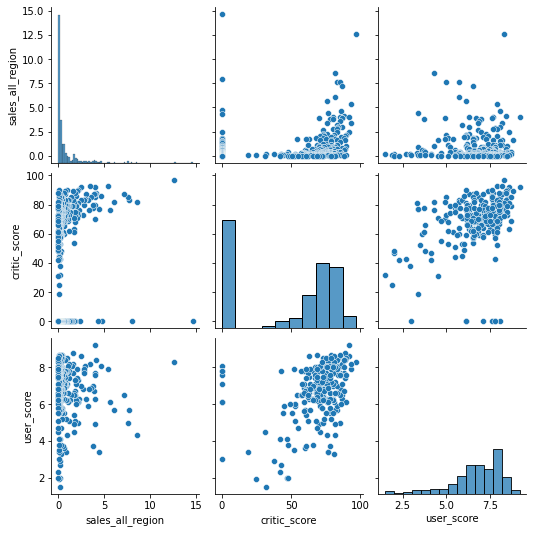

In [ ]:
# построим диаграмму
display('Диаграмма рассеяния для PS4')
sns.pairplot(game[game.platform == "PS4"][['sales_all_region', 'critic_score', 'user_score']])
plt.show()

In [ ]:
# выберем необходимые столбцы
columns_corr = ['sales_all_region', 'critic_score', 'user_score']
ps_four = game.query('platform == "PS4"')

# построим матрицу корреляции
game_matrix = ps_four[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.227550,-0.031957
critic_score,0.227550,1.000000,0.388245
user_score,-0.031957,0.388245,1.000000


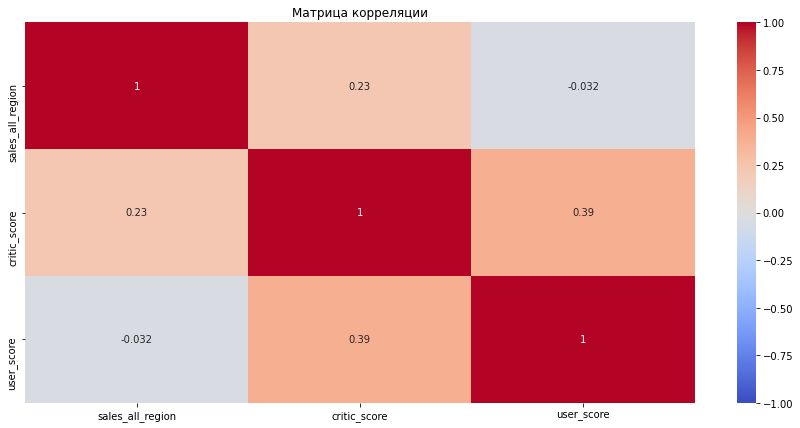

In [ ]:
# отразим матрицу корреляции графически
plt.figure(figsize = (15, 7))
sns.heatmap(game_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=columns_corr,
            xticklabels=columns_corr)
plt.title('Матрица корреляции')
plt.show()

**Вывод**

Существует прямая корреляция между продажами и оценкой критиков и равна 0.23. Это и понятно, что экспертное мнение важно для продаж и может даже использоваться в целях маркетинга при выходе игры на рынок.

Также есть корреляция между оценкой критика и оценкой пользователя и равна 0.39, то есть чем выше оценка критика, тем сильнее пользователи платформы прислушиваются к их мнению и тоже ставят высокие / схожие с ними оценки.

Корреляции отрицательна между продажами и оценкой пользователя, но она настолько мала, что ею можно пренебречь.

### Соотнесите выводы с продажами игр на других платформах.

Построим матрицы корреляции для других платформ.

In [ ]:
# выберем необходимые столбцы
columns_corr = ['sales_all_region', 'critic_score', 'user_score']
three_ds = game.query('platform == "3DS"')

# построим матрицу корреляции
game_matrix = three_ds[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.150265,0.197583
critic_score,0.150265,1.000000,0.525312
user_score,0.197583,0.525312,1.000000


In [ ]:
ds = game.query('platform == "DS"')

# построим матрицу корреляции
game_matrix = ds[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.079326,0.882709
critic_score,0.079326,1.000000,0.544705
user_score,0.882709,0.544705,1.000000


In [ ]:
pc = game.query('platform == "PC"')

# построим матрицу корреляции
game_matrix = pc[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.204221,-0.121867
critic_score,0.204221,1.000000,0.288601
user_score,-0.121867,0.288601,1.000000


In [ ]:
ps_three = game.query('platform == "PS3"')

# построим матрицу корреляции
game_matrix = ps_three[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.298979,-0.005144
critic_score,0.298979,1.000000,0.329528
user_score,-0.005144,0.329528,1.000000


In [ ]:
psp = game.query('platform == "PSP"')

# построим матрицу корреляции
game_matrix = psp[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.091510,-0.802302
critic_score,0.091510,1.000000,0.510177
user_score,-0.802302,0.510177,1.000000


In [ ]:
psv = game.query('platform == "PSV"')

# построим матрицу корреляции
game_matrix = psv[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.395080,-0.004339
critic_score,0.395080,1.000000,0.427525
user_score,-0.004339,0.427525,1.000000


In [ ]:
wii = game.query('platform == "Wii"')

# построим матрицу корреляции
game_matrix = wii[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.538121,0.296197
critic_score,0.538121,1.000000,0.380377
user_score,0.296197,0.380377,1.000000


In [ ]:
wiiu = game.query('platform == "WiiU"')

# построим матрицу корреляции
game_matrix = wiiu[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.298124,0.400219
critic_score,0.298124,1.000000,0.599728
user_score,0.400219,0.599728,1.000000


In [ ]:
x_threesix = game.query('platform == "X360"')

# построим матрицу корреляции
game_matrix = x_threesix[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.262028,0.006164
critic_score,0.262028,1.000000,0.378737
user_score,0.006164,0.378737,1.000000


In [ ]:
xone = game.query('platform == "XOne"')

# построим матрицу корреляции
game_matrix = xone[columns_corr].corr()
display(game_matrix)

,sales_all_region,critic_score,user_score
sales_all_region,1.000000,0.274839,-0.068925
critic_score,0.274839,1.000000,0.249320
user_score,-0.068925,0.249320,1.000000


**Вывод**

Рассматривая подробно матрицы корреляции по платформам , вцелом наблюдаем аналогичную картину как и по PS4. То есть существует прямая корреляция между продажами и оценкой критиков: 3DS, PC, PS3, PSV, Wii, Wiiu, X360, XOne.

Интересные наблюдения по платформе 3DS, так как там высокая прямая корреляция 0.52 между оценкой критиков и оценкой пользователя. Возможно, это связано с проведением более качественной оценки.

По платформе DS обратная картина и там высокая корреляция между продажами и оценкой пользователей 0.88. Возможно, это связано с тем, что создатели игр на этой платформе более каечтсвенно подходили к своим пользователям и им было важнее именно это направление, применены маркетинговые компании по продаже обычным прльзователям.

Отрицательная корреляция наблюдается между оценкой пользователя и продажами (в большей или меньшей степени) по платформам: PC, PS3, PSP, PSV, XOne. При этом у платформ она достаточно высокая PSP 0.8.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
# посмотрим на общее распределение игр по жанрам
g=game.pivot_table(index='genre', values='sales_all_region', aggfunc='count').sort_values(
    by='sales_all_region', ascending=False).reset_index().rename_axis(None, axis=1)
display(g)


,genre,sales_all_region
0,Action,1031
1,Role-Playing,370
2,Adventure,302
3,Sports,268
4,Shooter,235
5,Misc,192
6,Racing,115
7,Fighting,109
8,Platform,85
9,Simulation,80


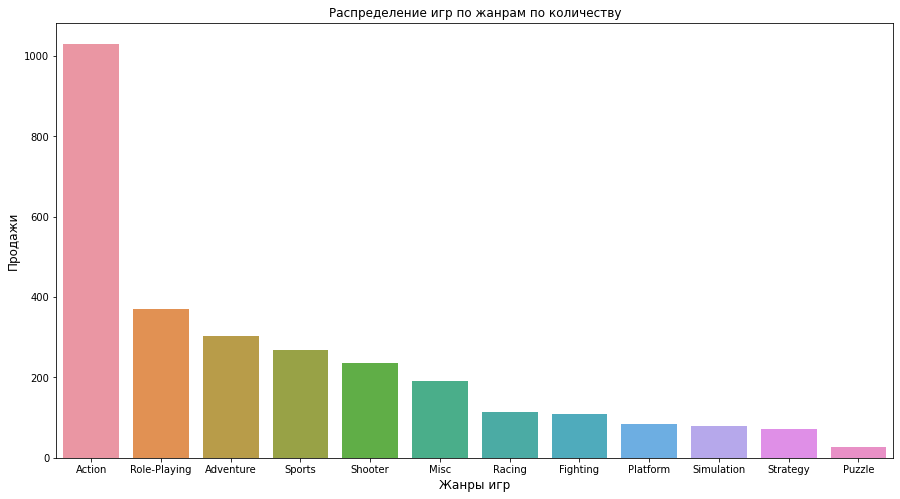

Самую большую долю занимают игры в жанре Action = 36%, затем Role-Playing = 13%, Adventure = 10% и Sports = 9%

In [ ]:
game.groupby('genre')[['sales_all_region']].median().sort_values('sales_all_region', ascending=False).style.bar()

,sales_all_region
genre,
Shooter,0.440000
Sports,0.240000
Platform,0.210000
Role-Playing,0.140000
Racing,0.140000
Fighting,0.130000
Action,0.120000
Misc,0.120000
Simulation,0.120000


Можно выделить самые прибыльные направления по жанрам в пересчете на медианное значение продаж: Shooter = 440 тыс, Sports = 240 тыс, Platform = 210 тыс.

Низкие продажи как по объему, так и по медиане в жанрах: Strategy = 71 млн (мед = 0,08), Puzzle = 28 млн (мед = 0,045).

## Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [ ]:
# отфильтруем популярные платформы в NA (продажи в Северной Америке)
na = game.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
display(na.head(10))

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
Wii      17.45
PSV      10.98
DS        4.59
Name: na_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других платформ
top_na = na.head()
display(top_na)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [ ]:
# отбираем "Другие" платформы
other_na = pd.Series(na[5:].sum(), index = ['Other'])
display(other_na)

Other    90.37
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_na = top_na.append(other_na)
platforms = top_na.index

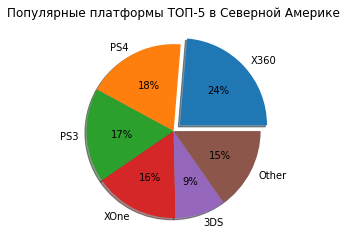

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по платформам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_na, labels=platforms, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные платформы ТОП-5 в Северной Америке')
ax.figsize=(15,10)
plt.show()

In [ ]:
# отфильтруем популярные платформы в EU (продажи в Европе)
eu = game.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
display(eu.head(10))

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
Wii      11.92
PSV      11.36
DS        3.53
Name: eu_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других платформ
top_eu = eu.head()
display(top_eu)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [ ]:
# отбираем "Другие" платформы
other_eu = pd.Series(eu[5:].sum(), index = ['Other'])
display(other_eu)

Other    90.12
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_eu = top_eu.append(other_eu)

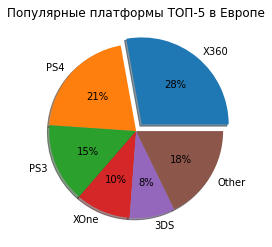

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по платформам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_eu, labels=platforms, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные платформы ТОП-5 в Европе')
ax.figsize=(15,10)
plt.show()

In [ ]:
# отфильтруем популярные платформы в JP (продажи в Японии)
jp = game.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
display(jp.head(10))

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.47
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
Name: jp_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других платформ
top_jp = jp.head()
display(top_jp)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [ ]:
# отбираем "Другие" платформы
other_jp = pd.Series(jp[5:].sum(), index = ['Other'])
display(other_jp)

Other    19.49
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_jp = top_jp.append(other_jp)

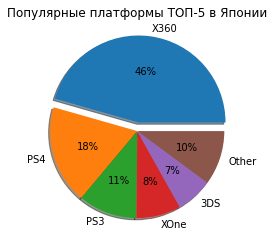

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по платформам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_jp, labels=platforms, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные платформы ТОП-5 в Японии')
ax.figsize=(15,10)
plt.show()

**Вывод**

Лидирующие доли продаж занимают платформы PS4 и PS3 от японского производителя Sony. В Америке доля PS4 = 24%, в Европе = 28%, в Японии = 46%.

Далее в рейтинг ТОП-5 входит платформа X360 и XOne от американского производителя Microsoft. В Америке доля X360 = 17%, в Европе = 15%, в Японии = 11%

Также в совокупности другие производители игровых платформ занимают долю от 10 до 15% нашего рейтинга.

Такая разница в структуре продаж по игровым платформам в зависимости от региона обусловлена тем, что на территории каждого континента "продвигается" "свой" производитель.

### Самые популярные жанры (топ-5). Поясните разницу.

In [ ]:
# отфильтруем популярные жанры в JP (продажи в Японии)
jpg = game.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
display(jpg.head(10))

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Name: jp_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других жанров
top_jpg = jpg.head()
display(top_jpg)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

In [ ]:
# отбираем "Другие" жанры
other_jpg = pd.Series(jpg[5:].sum(), index = ['Other'])
display(other_jpg)

Other    41.63
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_jpg = top_jpg.append(other_jpg)
genres=top_jpg.index
display(top_jpg)

Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Other           41.63
dtype: float64

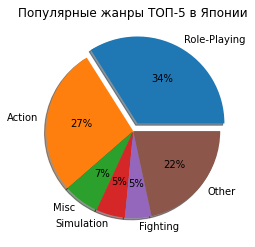

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по жанрам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_jpg, labels=genres, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные жанры ТОП-5 в Японии')
ax.figsize=(15,10)
plt.show()

In [ ]:
# отфильтруем популярные жанры в NA (продажи в Северной Америке)
nag = game.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
display(nag.head(10))

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Name: na_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других жанров
top_nag = nag.head()
display(top_nag)

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [ ]:
# отбираем "Другие" жанры
other_nag = pd.Series(nag[5:].sum(), index = ['Other'])
display(other_nag)

Other    84.64
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_nag = top_nag.append(other_nag)
genres=top_nag.index
display(top_nag)

Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Other            84.64
dtype: float64

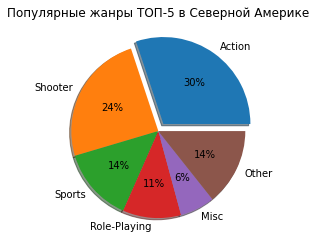

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по жанрам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_nag, labels=genres, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные жанры ТОП-5 в Северной Америке')
ax.figsize=(15,10)
plt.show()

In [ ]:
# отфильтруем популярные жанры в EU (продажи в Европе)
eug = game.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
display(eug.head(10))

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Name: eu_sales, dtype: float64

In [ ]:
# создадим отдельную таблицу для Топ-5 и других жанров
top_eug = eug.head()
display(top_eug)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [ ]:
# отбираем "Другие" жанры
other_eug = pd.Series(eug[5:].sum(), index = ['Other'])
display(other_eug)

Other    89.1
dtype: float64

In [ ]:
# добавляем строку к ТОП-5
top_eug = top_eug.append(other_eug)
genres=top_eug.index
display(top_eug)

Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Other            89.10
dtype: float64

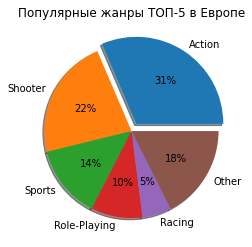

In [ ]:
# построили круговую диаграмму, чтобы понять как распределились доли по жанрам

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0,0 ,0)
ax.pie(x=top_eug, labels=genres, autopct='%.0f%%', shadow=True, explode=explode)
ax.set_title('Популярные жанры ТОП-5 в Европе')
ax.figsize=(15,10)
plt.show()

**Вывод**

Лидирующие доли продаж занимают разные жанры в зависимости от территориального признака. Такая разница в структуре продаж по жанрам в зависимости от региона обусловлена менталитетом общества, возрастной категорией и , возможно, некой направленностью поведения, транслирумого государством.

В Северной Америке структура по жанрам такая: Action - 30%, Shooter - 24%, Sports - 14%, Role-Playing - 11%, Misc - 6%, Others - 14%

В Европе: Action-31%, Shooter - 22%, Sports - 14%, Role-Playing - 10%, Racing - 5%, Others - 18%

В Японии: Role-Playing - 34%, Action-27%, Misc - 7%, Simulation - 5%, Fighting - 5%, Others - 22%







### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
# посмотрим сначала на распределение рейтинга внутри датасета без привязки к региону
display(game['rating'].value_counts())

UNDEF    1275
M         498
T         412
E         395
E10+      306
Name: rating, dtype: int64

Расшифровка:

- «M» («Mature») — «Для взрослых»
- «T» («Teen») — «Подросткам»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»


In [ ]:
# распределение объема продаж в Северной Америке по рейтингу ESRB
game.groupby('rating')[['na_sales']].sum().sort_values('na_sales', ascending=False).style.bar()

,na_sales
rating,
M,231.570000
E,114.370000
UNDEF,103.310000
E10+,75.700000
T,66.020000


In [ ]:
# распределение объема продаж в Европе по рейтингу ESRB
game.groupby('rating')[['eu_sales']].sum().sort_values('eu_sales', ascending=False).style.bar()

,eu_sales
rating,
M,193.960000
E,113.030000
UNDEF,91.500000
E10+,55.370000
T,52.960000


In [ ]:
# распределение объема продаж в Японии по рейтингу ESRB
game.groupby('rating')[['jp_sales']].sum().sort_values('jp_sales', ascending=False).style.bar()

,jp_sales
rating,
UNDEF,108.840000
E,28.330000
T,26.020000
M,21.200000
E10+,8.190000


In [ ]:
# подготовим сводную таблицу для построения графика по продажам в Северной Америке
r_na=game.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).rename_axis(None, axis=1)
display(r_na)

,na_sales
rating,
M,231.57
E,114.37
UNDEF,103.31
E10+,75.70
T,66.02


In [ ]:
# подготовим сводную таблицу для построения графика по продажам в Европе
r_eu=game.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).rename_axis(None, axis=1)
display(r_eu)

,eu_sales
rating,
M,193.96
E,113.03
UNDEF,91.50
E10+,55.37
T,52.96


In [ ]:
# подготовим сводную таблицу для построения графика по продажам в Европе
r_jp=game.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).rename_axis(None, axis=1)
display(r_jp)

,jp_sales
rating,
UNDEF,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


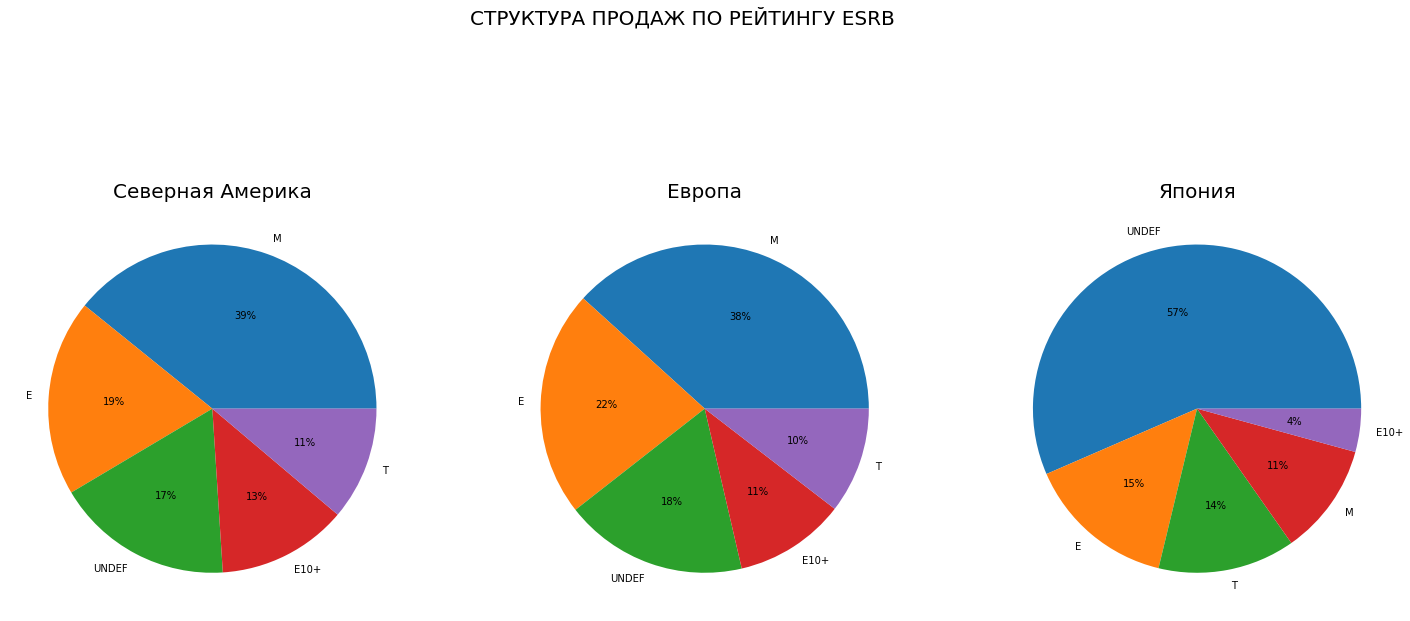

In [ ]:
# построение круговых диаграмм на одном графике по рейтингу ESRB
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(25,8))
fig.suptitle('СТРУКТУРА ПРОДАЖ ПО РЕЙТИНГУ ESRB',
             y = 1.2,
             fontsize = 20)
labels = r_na.index
ax1.pie(x=r_na['na_sales'], labels= labels, autopct='%.0f%%')
ax1.set_title('Северная Америка', fontsize = 20)


labels = r_eu.index
ax2.pie(x=r_eu['eu_sales'], labels= labels, autopct='%.0f%%')
ax2.set_title('Европа', fontsize = 20)

labels = r_jp.index
ax3.pie(x=r_jp['jp_sales'], labels= labels, autopct='%.0f%%')
ax3.set_title('Япония', fontsize = 20)

plt.show()

**Вывод**

По количественному показателю структура продаж в зависимости от рейтинга ESRB более менее однородна и нет сильных гэпов между оценками.

Если посмотреть на структуру продаж по регионам, то получается, что в Северной Америке лидируют продажи игр с рейтингом М (231 млн), в Европе также рейтнг М (193 млн) в фаворите, а в Японии структура продаж однородна и указанные рейтинги присутствут практически в равной мере: Е - 28 млн, Т - 26 млн, М - 21 млн.

В Северной Америке и Европе структура продаж практически похожа и наибольшую долю 38% занимают продажи в категории М - для взрослых. При этом доля с рейтингом "не определено" (UNDEF) также схожа и составляет 17%.

В Японии картина отличается и там большую долю занимают продажи, по которым рейтинг "не определен" (UNDEF) = 57%. 15% и 14% пользуются популярностью игры в категориях Е и Т соответственно, это игры "Для всех" и "Подростки"


## Общий вывод

**В ходе исследования были применены следующие алгоритмы изучения и анализа данных:**

- получение общей информации о выгрузке данных
- приведение наименования столбцов к нижнему регистру
- осуществлена работа с пропусками
- поиск и устранение дубликатов
- добавление новых расчетных столбцов с показателями
- изучение и исследование параметров продаж игровых платформ
- поиск взаимосвязей между параметрами и территориальными признаками
- визуализация данных в разбивке по регионам
- оценка объемов продаж по платформам, жанрам и рейтингам


**Получили ответы на поставленные вопросы, выявили структуру продаж по параметрам и составили портфель пользователей:**

- с развитием игровой индустрии после 1995 года наблюдали активную фазу роста и вплоть до 2008 года, а с 2009 года мы видим нисходящий тренд, причиной которому общемировой кризис ресурсов, профессиональных кадров
- средний срок жизни игровой платформы 8-10 лет, поэтому необходимо обновляться в этом направлении, чтобы сохранять долю на рынке
- лидирующие платформы - это  PS4, 3DS, XOne, которые пришли на смену PS3, X360. А значит следующий 5-7 лет будут направлены на модернизацию этих платформ
- матрица корреляции выявила не столь сильное влияние рейтинга критиков и пользователей на продажи, но положительная динамика есть и возможно в будущем с появлением технологий смогут более активно влиять на продажи
- структура анализа игр по жанрам и количеству отражает нам самые популярные направления: Action - 36%, Role-playing - 13% и Adventure - 11%
- структура анализа игр по жанрам и продажам практически идентична: Action - 441 млн, Shooter 305 млн, Role-Playing - 193 млн, Sports - 181 млн
- портреть пользователей игр в зависимости от региона можно составить на основании объема продаж, жанра и оценки по рейтингу ESRB.
    - Американский пользователь: платформа X360 или PS4,  Action или Shooter,  взрослый человек 18+
    - Европейский пользователь: платформа X360 или PS4, Action или Shooter, взрослый человек 18+
    - Японский пользователь: платформа X360 или PS4, Role-playing или Action,  для всех без привязки к возрасту
- при дальнейшем изучении направления игровой индустрии производятелям необходимо учитывать также жанр игры, возрастное ограничение и платежеспособность пользователей игр.

**Промежуточные итоги:**

**1. Предобработка данных**

Для качественного исследования данные прошли следующие итерации:

- заголовки в столбцах были приведены к нижнему регистру
- произведена замена пропусков в столбцах: name и genre - заполнено пустой строкой, year_of_release - удалены эти строки, user_score, rating, critic_score - было принято решение оставить строки пустыми
- изучены и изменены типы данных в столбцах: year_of_release - int64, user_score - float, rating - - значения nan заменены на значение "UNDEF", critic_score - int64
- добавлен новый столбец по итоговым продажам в представленных регионах sales_all_region
- поиск дубликатов - дубликаты не обнаружены


**2. ИДА**

**2.1.** Исследование данных по продажам игр на различных платформах производилось за период с 1980 по 2016 годы.

Индустрия развивалась в период с 1980 по 1995 годы (данные не слишком волатильны). Далее с развитием технологий и появлением персональных компьютеров с 1995 по 2000 год наблюдаем достаточную активность в росте продаж / выпуска игр. Активный рост наблюдается вплоть до 2008 года (к этому времени появилось много бесплатных игр).

**2.2.** Выбор ТОП-6 платформ по объему продаж млн копий до 700 млн. : 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

PS существовала в период с 1994 по 2002 (8 лет), пока на смену не пришла PS2 в период с 2000 по 2006 (6 лет). Далее на смену ей пришла PS3 c 2006 по 2016 (10 лет). Платформа X360 просуществовала в период с 2005 по 2016 год, тоже 10 лет.

В итоге средний срок 8-10 лет для обновления платформы.

**2.3.** Был отобран более актуальный период для анализа и прогноза - год выпуска платформ с 2012 года. Это связано с тем, что когда запускается игровая платформа в среднем ей нужно 2-3 года на раскрутку, затем еще 2 года для достижения пиковых значений и потом продажи идут на спад с таким же темпом.

**2.4.** Анализ динамики продаж топовых платфор за период с 2012 по 2016 годы:

Продажи по всем платформам глобально падают в динамике по годам. Однако стоит отметить все же рост по двум платформам:

PS4: 26 - 100 - 119 (запуск с 2013), данная платформа идет на смену предыдущей PS3, поэтому мы и наблюдаем рост в этом промеждутке лет.

XOne: 19 - 54 - 60 (запуск с 2013), данная платформа идет на смену предыдущей Х360 , поэтому мы и наблюдаем рост в этом промеждутке лет.

**2.5.** Отражение на диаграмме размаха продаж по платформам.

По представленным данным видим, что максимальный объем продаж составил 21 млн копий и был по игре Grand Theft Auto V на PS3 в 2013 году. Минимальные значения 0.01 млн по продажам приходится на ряд игр, выпущенных в 2014 и 2016 годах (см таблицу выше).

Среднее значение составляет 0.50 млн, а медиана равна 0.12 млн

По представленным данным видим, что максимальный объем продаж составил 21 млн копий и был по игре Grand Theft Auto V на PS3 в 2013 году. Минимальные значения 0.01 млн по продажам приходится на ряд игр, выпущенных в 2014 и 2016 годах (см таблицу выше).

Среднее значение составляет 0.50 млн, а медиана равна 0.12 млн

**2.6.** Корреляция.

Существует прямая корреляция между продажами и оценкой критиков и равна 0.23. Это и понятно, что экспертное мнение важно для продаж.

Также есть корреляция между оценкой критика и оценкой пользователя и равна 0.39, то есть чем выше оценка критика, тем сильнее пользователи платформы прислушиваются к их мнению.

Рассматривая подробно матрицы корреляции по платформам , вцелом наблюдаем аналогичную картину как и по PS4. То есть существует прямая корреляция между продажами и оценкой критиков: 3DS, PC, PS3, PSV, Wii, Wiiu, X360, XOne.

Отрицательная корреляция наблюдается между оценкой пользователя и продажами (в большей или меньшей степени) по платформам: PC, PS3, PSP, PSV, XOne. При этом у платформ она достаточно высокая PSP 0.8.

**2.7.** Продажи по жанрам.

Можно выделить самые прибыльные направления по жанрам в пересчете на медианное значение продаж: Shooter = 440 тыс, Sports = 240 тыс, Platform = 210 тыс.

Самую большую долю занимают игры в жанре Action = 36%, затем Role-Playing = 13%, Adventure = 10% и Sports = 9%


**3. Рейтинг ТОП-5 по территориальному признаку: платформы, жанры**

Лидирующие доли продаж занимают платформы PS4 и PS3 от японского производителя Sony. В Америке доля PS4 = 24%, в Европе = 28%, в Японии = 46%.

Далее в рейтинг ТОП-5 входит платформа X360 и XOne от американского производителя Microsoft. В Америке доля X360 = 17%, в Европе = 15%, в Японии = 11%

* В Северной Америке структура по жанрам такая: Action - 30%, Shooter - 24%, Sports - 14%, Role-Playing - 11%, Misc - 6%, Others - 14%

* В Европе: Action-31%, Shooter - 22%, Sports - 14%, Role-Playing - 10%, Racing - 5%, Others - 18%

* В Японии: Role-Playing - 34%, Action-27%, Misc - 7%, Simulation - 5%, Fighting - 5%, Others - 22%

**4. Рейтинг ESRB и его структура**

В Северной Америке лидируют продажи игр с рейтингом М (231 млн), в Европе также рейтнг М (193 млн) в фаворите, а в Японии структура продаж однородна и указанные рейтинги присутствут практически в равной мере: Е - 28 млн, Т - 26 млн, М - 21 млн.

В Северной Америке и Европе структура продаж практически похожа и наибольшую долю 38% занимают продажи в категории М - для взрослых. При этом доля с рейтингом "не определено" (UNDEF) также схожа и составляет 17%.

В Японии картина отличается и там большую долю занимают продажи, по которым рейтинг "не определен" (UNDEF) = 57%. 15% и 14% пользуются популярностью игры в категориях Е и Т соответственно, это игры "Для всех" и "Подростки".